In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

col = [
    '0', 'Year', 'DayOfYear', 'HourMin', 'AirTemperature', 'RelativeHumidity',
    'SoilTemperature', 'AirPressure', 'Rainfall', 'MinWindSpeed', 'MaxWindSpeed',
    'AvgWindSpeed', 'WindDirection', 'AvgFlux', 'TotalFlux'
]

path= r'D:\Coding\python\VBO\VBO.csv'

data= pd.read_csv(path,names=col)
data.head()
data= data[~data['0'].astype('str').str.startswith('102')]

data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
daily_avg = data.groupby('DayOfYear').mean().reset_index()


In [2]:
data.head()

,0,Year,DayOfYear,HourMin,AirTemperature,RelativeHumidity,SoilTemperature,AirPressure,Rainfall,MinWindSpeed,MaxWindSpeed,AvgWindSpeed,WindDirection,AvgFlux,TotalFlux
0,101,2023,1,10,16.94,97.4,17.72,1023.3,0.0,0.0,0.0,0.0,72.4,0.0,0.0
1,101,2023,1,20,16.66,97.7,17.68,1023.2,0.0,0.0,0.0,0.0,72.4,0.0,0.0
2,101,2023,1,30,16.64,98.7,17.65,1023.2,0.0,0.0,0.0,0.0,72.4,0.0,0.0
3,101,2023,1,40,16.83,98.8,17.61,1023.0,0.0,0.0,0.0,0.0,72.4,0.0,0.0
4,101,2023,1,50,16.98,99.8,17.58,1022.9,0.0,0.0,0.0,0.0,72.4,0.0,0.0


In [3]:
min_temp = daily_avg['AirTemperature'].min()
min_temp = [min_temp] * len(daily_avg)
max_temp = daily_avg['AirTemperature'].max()
max_temp = [max_temp] * len(daily_avg)

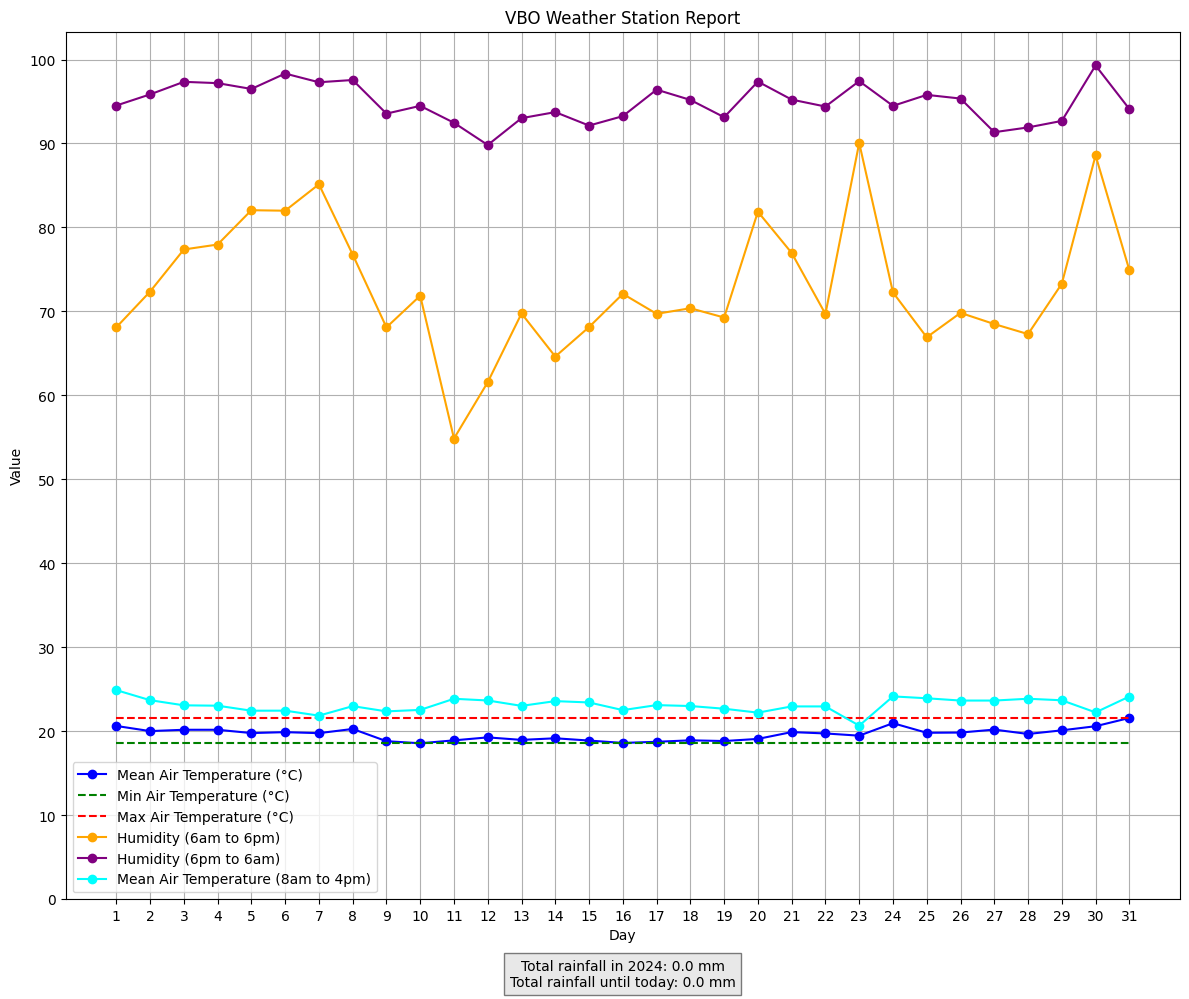

In [16]:
data_8am_to_4pm = data[(data['HourMin'] >= 800) & (data['HourMin'] <= 1600)]
mean_air_temp_8am_to_4pm = data_8am_to_4pm.groupby(['Year', 'Month', 'DayOfMonth'])['AirTemperature'].mean().reset_index()
plt.figure(figsize=(12, 10))

plt.plot(daily_avg['DayOfYear'], daily_avg['AirTemperature'], label='Mean Air Temperature (°C)', marker='o', color='blue')
plt.plot(daily_avg['DayOfYear'], min_temp, label='Min Air Temperature (°C)', linestyle='--', color='green')
plt.plot(daily_avg['DayOfYear'], max_temp, label='Max Air Temperature (°C)', linestyle='--', color='red')

humidity_6to18 = data[(data['HourMin'] >= 600) & (data['HourMin'] <= 1800)].groupby('DayOfYear')['RelativeHumidity'].mean()
humidity_18to6 = data[(data['HourMin'] > 1800) | (data['HourMin'] < 600)].groupby('DayOfYear')['RelativeHumidity'].mean()
plt.plot(humidity_6to18.index, humidity_6to18, label='Humidity (6am to 6pm)', marker='o', color='orange')
plt.plot(humidity_18to6.index, humidity_18to6, label='Humidity (6pm to 6am)', marker='o', color='purple')
plt.plot(mean_air_temp_8am_to_4pm['DayOfMonth'], mean_air_temp_8am_to_4pm['AirTemperature'], marker='o', color='cyan', label='Mean Air Temperature (8am to 4pm)')

plt.xlabel('Day')
plt.ylabel('Value')
plt.title('VBO Weather Station Report')
plt.xticks(range(1, daily_avg['DayOfYear'].max() + 1, 1))
plt.yticks(range(0, 101, 10))

total_rainfall_year = data['Rainfall'].sum()
current_day_of_year = pd.Timestamp.now().dayofyear
total_rainfall_month = data[data['DayOfYear'] <= current_day_of_year]['Rainfall'].sum()
text = f'Total rainfall in 2024: {total_rainfall_year} mm\nTotal rainfall until today: {total_rainfall_month} mm'
plt.text(0.5, -0.1, text, ha='center', transform=plt.gca().transAxes, bbox=dict(facecolor='lightgray', alpha=0.5))

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



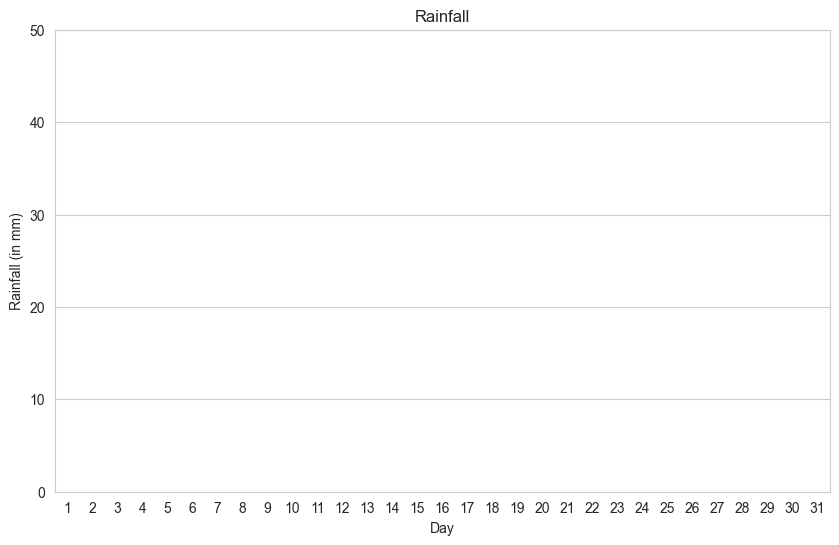

In [31]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_avg['DayOfYear'], y=daily_avg['Rainfall'], color='skyblue')
plt.xlabel('Day')
plt.ylabel('Rainfall (in mm)')
plt.title('Rainfall')
plt.ylim((0,50))
plt.show()


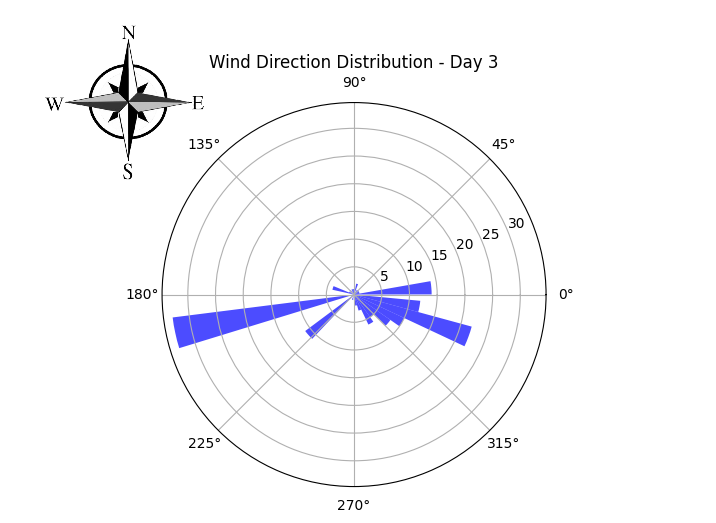

In [14]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

user_input_day = int(input('Enter Day: '))
selected_day_data = data[data['DayOfYear'] == user_input_day]
fig = plt.figure()

ax = fig.add_subplot(111, position=[0.1, 0.1, 0.7, 0.8], projection='polar')
angles = np.radians(selected_day_data['WindDirection'])
ax.hist(angles, bins=36, color='blue', alpha=0.7)
ax.set_title(f'Wind Direction Distribution - Day {user_input_day}')

extra_ax = fig.add_subplot(111, position=[0.8, 0.1, 0.2, 0.8], frameon=False)
extra_ax.set_xticks([])
extra_ax.set_yticks([])

img_path = r'D:\Coding\python\VBO\cardinal.png'
img = plt.imread(img_path)
imagebox = OffsetImage(img, zoom=0.28)
ab = AnnotationBbox(imagebox, (np.pi/2, 1), xycoords='axes fraction', xybox=(-0.1, 1), boxcoords="axes fraction", frameon=False)
ax.add_artist(ab)

plt.show()